<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/Parcial_2_2024_05_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

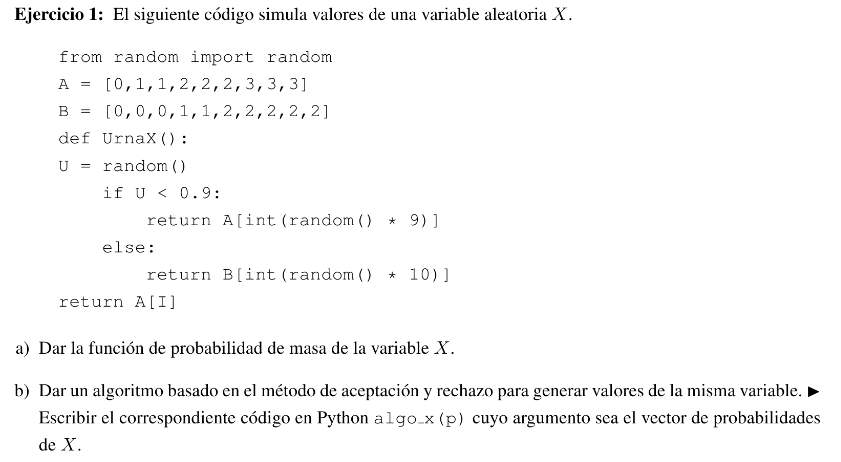

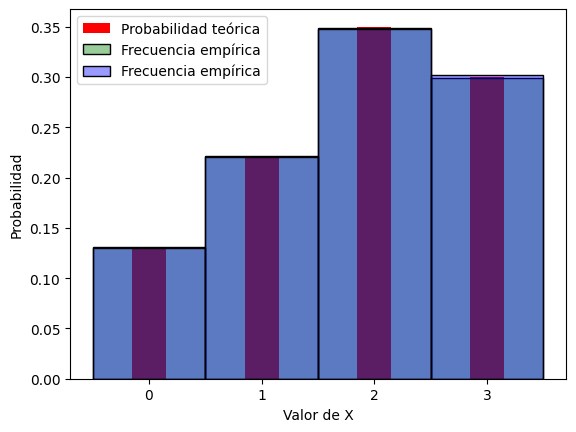

In [52]:
# 1.b
from random import random
import math

def algo_x(p):
  while True:
    muestra = int(random() * 4)
    if random() <= p[muestra] / 0.35:
      return muestra

A = [0,1,1,2,2,2,3,3,3]
B = [0,0,0,1,1,2,2,2,2,2]
def UrnaX():
  if random() < 0.9:
    return A[int(random() * 9)]
  else:
    return B[int(random() * 10)]

# verificacion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

valores = np.array([0.13, 0.22, 0.35, 0.3])
muestras_algo_x = [algo_x(valores) for _ in range(10_000)]
muestras_UrnaX = [UrnaX() for _ in range(10_000)]

def f(x):
    return valores[x]

dom = np.arange(4)

plt.bar(dom, valores, color='red', width=0.3, label="Probabilidad teórica")
sns.histplot(muestras_algo_x, stat='density', discrete=True, color='green', alpha=0.4, label="Frecuencia empírica")
sns.histplot(muestras_UrnaX, stat='density', discrete=True, color='blue', alpha=0.4, label="Frecuencia empírica")

plt.xticks(dom)
plt.xlabel("Valor de X")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

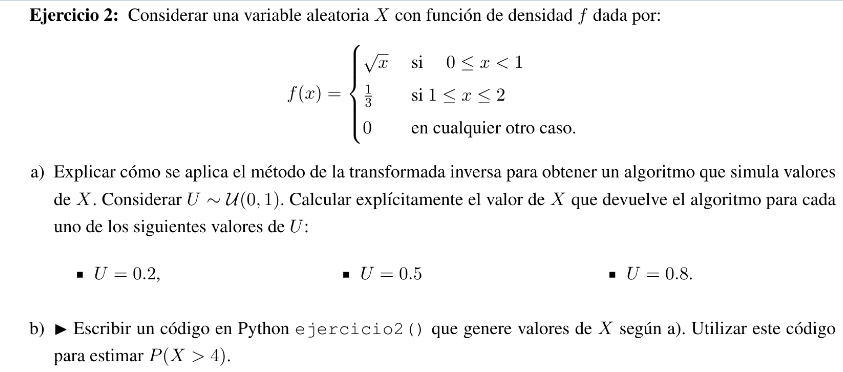

P(X>4)=  0.0


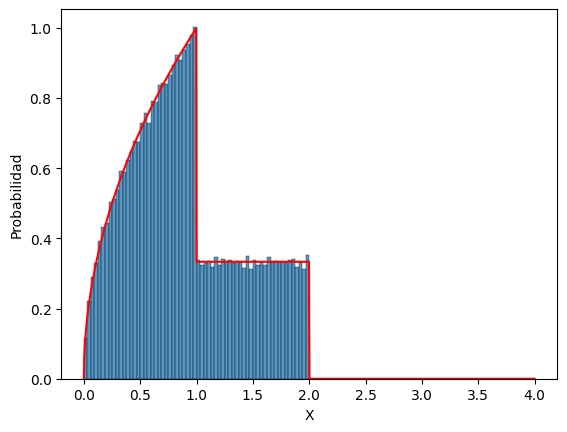

In [40]:
def ejercicio2():
  u = random()
  if u < 2/3:
    return (u*3/2)**(2/3)
  else:
    return u*3-1

muestras = [ejercicio2() for _ in range(100_000)]

prob_xmayor4 = len([x for x in muestras if x > 4])/len(muestras)

print('P(X>4)= ',prob_xmayor4)

#verificacion

def f(x):
  return np.where(
      ((0 <= x) & (x < 1)),
      np.sqrt(x),
      np.where(
          ((1 <= x) & (x <= 2)),
          1/3,
          0
      )
  )

dom = np.linspace(0,4,1000)
sns.lineplot(x=dom, y=f(dom), color='red')
sns.histplot(muestras, stat='density')
plt.ylabel('Probabilidad')
plt.xlabel('X')
plt.show()

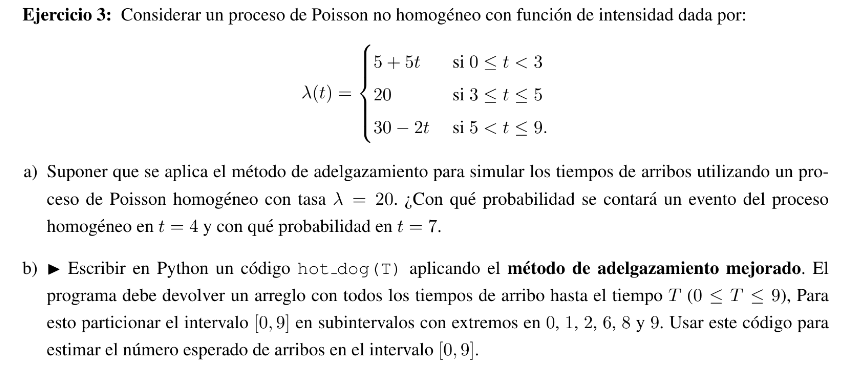

In [42]:
def generar_tiempo_exponencial(tasa_lambda):
  return -np.log(1 - random()) / tasa_lambda

def generar_PPNH_mejorado(func_intensidad, tabla_tasa_tiempo):
  eventos = []
  t_actual = generar_tiempo_exponencial(tabla_tasa_tiempo[0][0])

  for i, (l_max, t_lim) in enumerate(tabla_tasa_tiempo):
    while t_actual <= t_lim:
        if random() < func_intensidad(t_actual) / l_max:
          eventos.append(t_actual)
        t_actual += generar_tiempo_exponencial(l_max)

    if i + 1 == len(tabla_tasa_tiempo): break
    t_actual = t_lim + (t_actual - t_lim) * (l_max / tabla_tasa_tiempo[i+1][0])

  return eventos

In [60]:
tabla_tasa_tiempo = [(10,1),(15,2),(20,6),(18,8),(14,9)]

def func_intensidad(t):
  if 0 <= t < 3:
    return 5 + 5*t
  elif 3 <= t < 5:
    return 20
  elif 5 <= t <= 9:
    return 30 - 2*t
  return 0


def hot_dog(t):
  tabla = list(filter(lambda x: x[1] <= t, tabla_tasa_tiempo))
  return generar_PPNH_mejorado(func_intensidad, tabla)

N = 100_000
procesos = [generar_PPNH_mejorado(func_intensidad, tabla_tasa_tiempo) for _ in range(N)]
arribos_por_proceso = [len(p) for p in procesos]
arribos_esperados = sum(arribos_por_proceso) / len(arribos_por_proceso)
print('arribos esperados: ', arribos_esperados)

arribos esperados:  141.46151


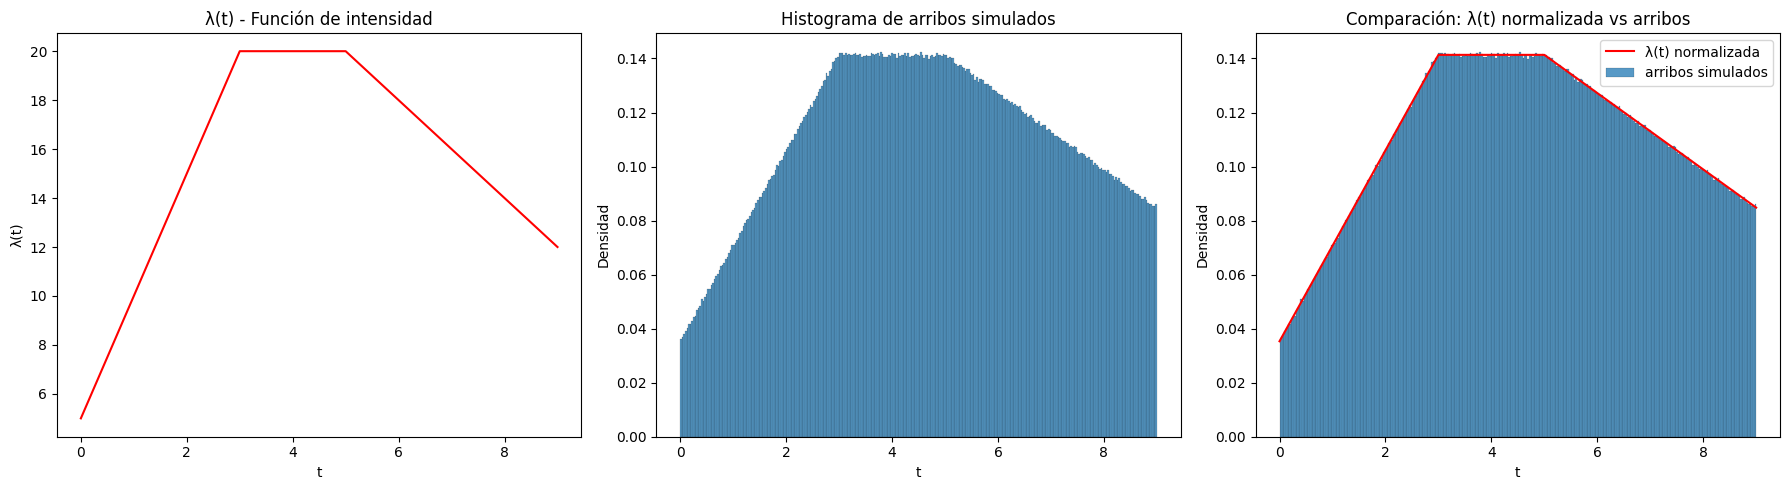

In [75]:
dominio = np.arange(0, 10)

from scipy.integrate import quad
# Normalización de la función de intensidad:
# Se convierte λ(t) en una función de densidad de probabilidad dividiendo por ∫λ(t)dt en [0,9],
# garantizando que el área bajo la curva sea 1. Esto permite compararla directamente con el histograma normalizado de arribos.
integral_de_0_a_9, _ = quad(func_intensidad, 0, 9)
y_normalizado = [func_intensidad(t) / integral_de_0_a_9 for t in dominio]

y = [func_intensidad(t) for t in dominio]
procesos_aplanados = [t for p in procesos for t in p]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: función de intensidad λ(t)
sns.lineplot(x=dominio, y=y, ax=axes[0], color='red')
axes[0].set_title('λ(t) - Función de intensidad')
axes[0].set_xlabel('t')
axes[0].set_ylabel('λ(t)')

# Gráfico 2: histograma de arribos simulados
sns.histplot(procesos_aplanados, stat='density', ax=axes[1])
axes[1].set_title('Histograma de arribos simulados')
axes[1].set_xlabel('t')
axes[1].set_ylabel('Densidad')

# Gráfico 3: λ(t) normalizada vs. arribos
sns.lineplot(x=dominio, y=y_normalizado, label='λ(t) normalizada', ax=axes[2], color='red')
sns.histplot(procesos_aplanados, stat='density', label='arribos simulados', ax=axes[2])
axes[2].legend()
axes[2].set_title('Comparación: λ(t) normalizada vs arribos')
axes[2].set_xlabel('t')
axes[2].set_ylabel('Densidad')

plt.tight_layout()
plt.show()


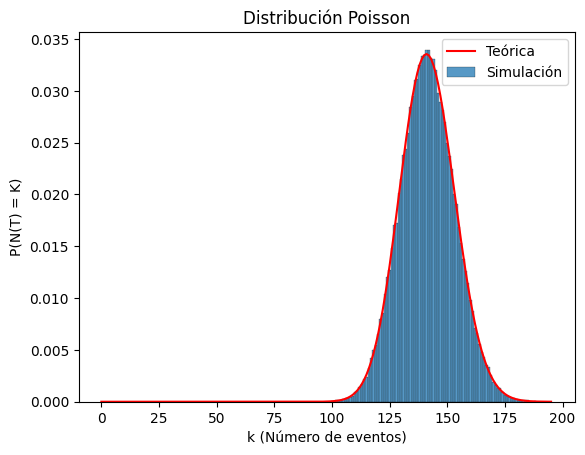

In [67]:

def f_poisson(l, k): # l = l*t para homogeneo o m(s,t) para no homogeneo
    return np.exp(-l) * l**k / math.factorial(k)

dominio = np.arange(0, max(arribos_por_proceso) + 1)

# prob_teorica = [f_poisson(arribos_esperados, k) for k in dominio]
from scipy.stats import poisson
prob_teorica = poisson.pmf(dominio, mu=arribos_esperados)

sns.lineplot(x=dominio, y=prob_teorica, color='red', label='Teórica')
sns.histplot(arribos_por_proceso, stat='density', label="Simulación", discrete=True)

plt.title(f'Distribución Poisson')
plt.xlabel('k (Número de eventos)')
plt.ylabel('P(N(T) = K)')
plt.legend()